In [54]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import contextily as ctx


In [55]:
file_path = 'Metro_BusStops_CityofLA.shp' 

In [56]:
files = os.listdir()
print(files)

['Data', 'week 4', '.git', 'Transit.png', '.ipynb_checkpoints', 'Practice.ipynb', 'week 2 assignment.ipynb', 'README.md', 'Untitled.ipynb', 'week 2']


In [57]:
full_file_path = '/home/jovyan/up221-nasir/Data/Metro_BusStops_CityofLA.shp'


In [58]:
gdf = gpd.read_file(full_file_path)

In [59]:
neighborhoods_file_path = '/home/jovyan/up221-nasir/Data/LA_Times_Neighborhood_Boundaries.geojson'

neighborhoods_gdf = gpd.read_file(neighborhoods_file_path)

In [60]:
gdf = gdf.drop_duplicates()

In [61]:
df = gdf.set_crs('epsg:4326', allow_override=True)

gdf = gdf.to_crs('epsg:3857')

In [62]:
df = gdf.set_crs('epsg:4326', allow_override=True)

gdf = gdf.to_crs('epsg:3857')

In [63]:
print(os.path.exists(neighborhoods_file_path))

True


In [64]:
gdf = gdf.drop(columns=['Join_Count', 'TARGET_FID', 'Join_Cou_1', 'TARGET_F_1', 'F_'])

In [65]:
gdf = gdf.rename(columns={'lng': 'longitude', 'lat': 'latitude', 'CountStop': 'stop_count', 'OBJECTID_1': 'object_id', 'DISTRICT': 'district'})
gdf = gdf.drop_duplicates(subset='uuid')

In [66]:
gdf['district'] = gdf['district'].astype(int)
gdf['shelter_pr'] = gdf['shelter_pr'].map({'Yes': True, 'No': False})


In [67]:
gdf = gdf[gdf.is_valid]


In [68]:
gdf['SB535'] = gdf['SB535'].replace(0, np.nan)  
gdf = gdf.dropna(subset=['SB535'])  

In [69]:
gdf['has_shelter'] = gdf['shelter_pr']


In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
gdf['RASTERVALU_normalized'] = scaler.fit_transform(gdf[['RASTERVALU']])

In [71]:
bus_stops_gdf = gpd.read_file('/home/jovyan/up221-nasir/Data/Metro_BusStops_CityofLA.shp')



In [72]:
print(bus_stops_gdf.columns)



Index(['Join_Count', 'TARGET_FID', 'Join_Cou_1', 'TARGET_F_1', 'F_', 'lat',
       'lng', 'uuid', 'shelter_pr', 'Shelter', 'CountStop', 'OBJECTID_1',
       'DISTRICT', 'SB535', 'RASTERVALU', 'geometry'],
      dtype='object')


In [73]:
print(neighborhoods_gdf.head())
print(gdf.head())


   OBJECTID                    name  \
0         1         Adams-Normandie   
1         2                  Arleta   
2         3       Arlington Heights   
3         4         Atwater Village   
4         5  Baldwin Hills/Crenshaw   

                                            geometry  
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...  
1  POLYGON ((-118.44255 34.26412, -118.44240 34.2...  
2  POLYGON ((-118.31862 34.05306, -118.31673 34.0...  
3  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...  
4  POLYGON ((-118.36102 34.02532, -118.36026 34.0...  
    latitude   longitude                                  uuid  shelter_pr  \
1  34.050622 -118.240582  13347bdd-bb79-4414-9334-b3948b2ad0b6       False   
6  34.049243 -118.246038  1acd7941-59e9-4524-8dce-7d120a38b1bc       False   
7  34.052093 -118.239732  d3b4e48a-8dfb-4f50-c917-ec9b6021c29b        True   
8  34.050911 -118.237672  0d45a085-c0a5-415a-f62a-00aed1bb7ce8       False   
9  34.051034 -118.246348  a31721df-8909-49c2-

In [74]:
bus_stops_with_shade = bus_stops_gdf[bus_stops_gdf['Shelter'] == 1]
bus_stops_without_shade = bus_stops_gdf[bus_stops_gdf['Shelter'] == 0]

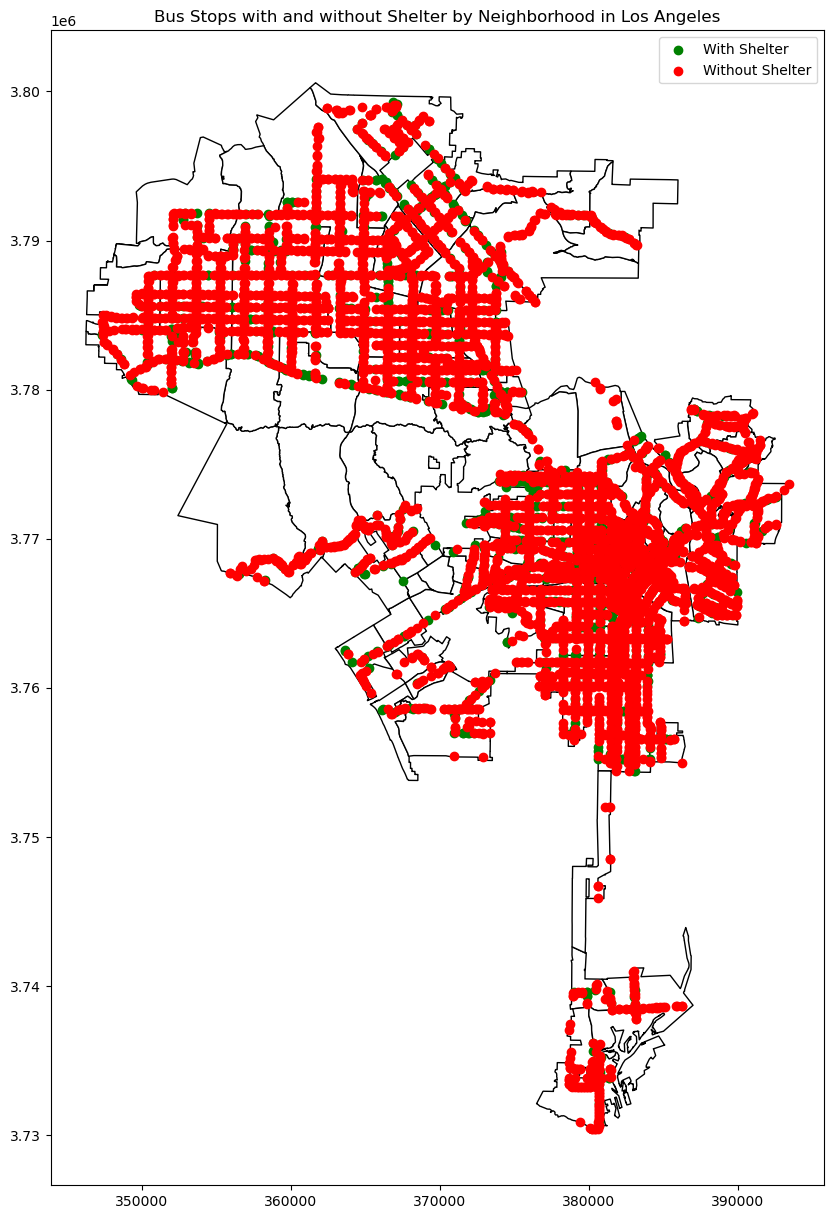

In [75]:
neighborhoods_gdf = neighborhoods_gdf.to_crs(bus_stops_gdf.crs)

bus_stops_with_neighborhoods = gpd.sjoin(bus_stops_gdf, neighborhoods_gdf, predicate='within')

bus_stops_count = bus_stops_with_neighborhoods.groupby('name').size()

neighborhoods_gdf['bus_stop_count'] = neighborhoods_gdf['name'].map(bus_stops_count)

fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods_gdf.plot(ax=ax, color='white', edgecolor='black', legend=True)
bus_stops_with_shade.plot(ax=ax, marker='o', color='green', label='With Shelter')
bus_stops_without_shade.plot(ax=ax, marker='o', color='red', label='Without Shelter')

plt.legend()
plt.title('Bus Stops with and without Shelter by Neighborhood in Los Angeles')
plt.show()

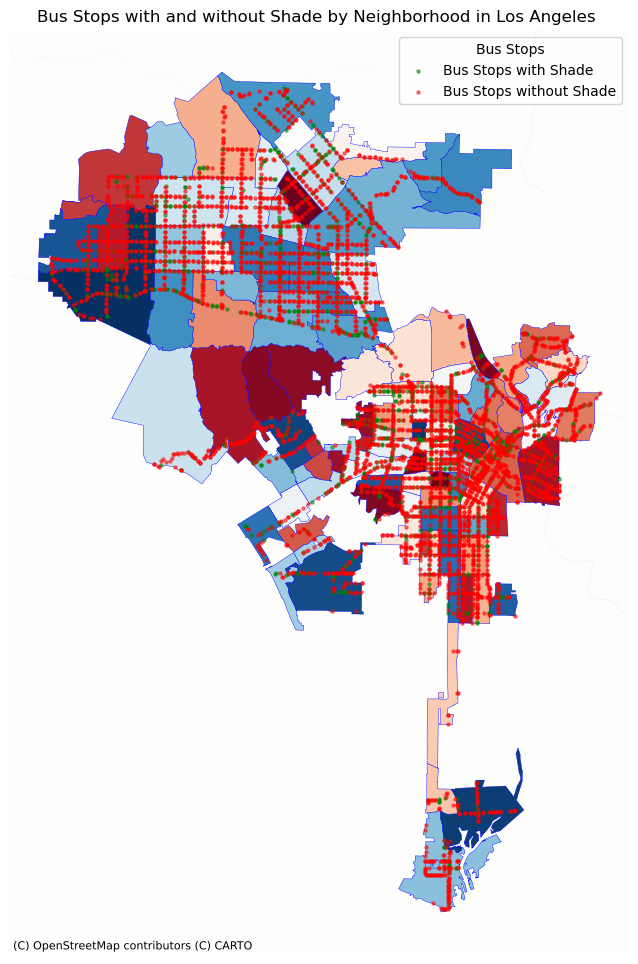

In [76]:
import contextily as ctx

fig, ax = plt.subplots(figsize=(12, 12))

neighborhoods_gdf.plot(ax=ax, column='name', legend=True, cmap='RdBu', edgecolor='b', linewidth=0.3)

ax.set_title('Bus Stops with and without Shade by Neighborhood in Los Angeles ')
ax.axis('off')

bus_stops_with_shade.plot(ax=ax, marker='o', color='green', markersize=5, alpha=0.5, label='Bus Stops with Shade')
bus_stops_without_shade.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5, label='Bus Stops without Shade')

ax.legend(title='Bus Stops')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.3)

plt.show()

fig.savefig('Transit.png')


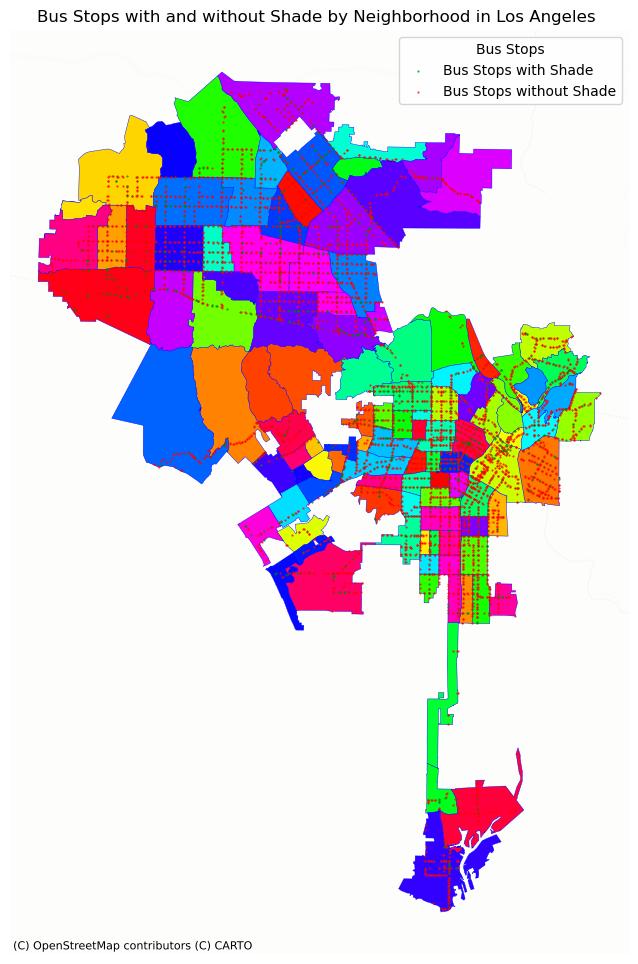

In [77]:

fig, ax = plt.subplots(figsize=(12, 12))

neighborhoods_gdf.plot(ax=ax, column='name', legend=True, cmap='hsv', edgecolor='b', linewidth=0.3)

ax.set_title('Bus Stops with and without Shade by Neighborhood in Los Angeles ')
ax.axis('off')

bus_stops_with_shade.plot(ax=ax, marker='o', color='green', markersize=0.3, alpha=0.8, label='Bus Stops with Shade')
bus_stops_without_shade.plot(ax=ax, marker='o', color='red', markersize=0.3, alpha=0.8, label='Bus Stops without Shade')

ax.legend(title='Bus Stops')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.3)

plt.show()

fig.savefig('Transit.png')